In [115]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(
    style='ticks',
    font_scale=1.5,
    context='paper'
)
import scipy.misc

colors = sns.color_palette('Set1')

In [116]:
def H(x, ρ, W, w):
    ω = W * x + w * (1 - x)
    x = x * ρ * W/ω + x * (1 - ρ)
    ω = w * x + W * (1 - x)
    x = x * ρ * w/ω + x * (1 - ρ)
    return x

def x_star(ρ, W, w):
    return 1/2 - (W + w - np.sqrt((1-ρ)**2 * (W-w)**2 + 4*W*w))/(2 * (2-ρ) * (W-w))

In [117]:
x = np.linspace(0, 1, 1000)

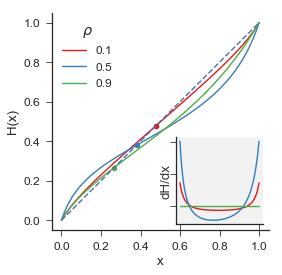

In [120]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
fig, ax = plt.subplots()

for ρ, c in zip([0.1, 0.5, 0.9], colors):
    ax.plot(x, H(x, ρ, 1.0, 0.1), color=c, label=ρ)
    ax.plot(x_star(ρ, 1.0, 0.1), x_star(ρ, 1.0, 0.1), 'o', color=c)
ax.plot(x, x, '--')
ax.set(
    xlabel='x',
    ylabel='H(x)'
)
ax.legend(loc='upper left', title=r'$\rho$')

ax.set_aspect(1.)

size = '40%'
axins = inset_axes(ax, width=size, height=size, loc=4, axes_kwargs=dict(fc='#f2f2f2'))
for ρ, c in zip([0.1, 0.5, 1.0], colors):
    axins.plot(x, scipy.misc.derivative(H, x, dx=0.001, args=(ρ, 1.0, 0.1)), color=c, label=ρ)

plt.xticks(visible=False)
plt.yticks(visible=False)
plt.ylabel("dH/dx").set_color('#333333')
sns.despine()
fig.savefig('../figures/H(x).pdf')

In [2]:
from sympy import *
init_printing()

x, ρ, W, w = symbols('x, ρ, W, w'.replace(',', ''))

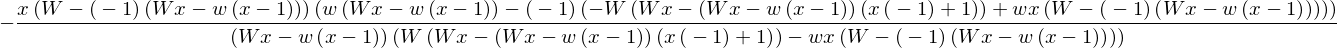

In [9]:
ω = W * x + w * (1 - x)
FAx = x * ρ * W/ω + x * (1 - ρ)
ω = w * FAx + W * (1 - FAx)
Hx = FAx * ρ * w/ω + FAx * (1 - ρ)
Hx = simplify(Hx)
Hx

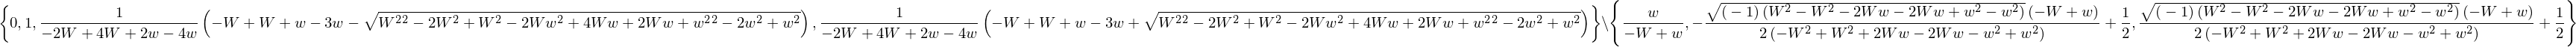

In [19]:
solveset((Hx-x),x)